## Lab-3.1: CNN Multi-class classification 

In this lab we perform multi-class classification with a CNN using `PyTorch` **AND** `Keras`. 

**Submission:**

* You need to upload TWO documents to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of the completed `MNIST.ipynb` notebook (MNIST in Keras)
  * (1) A PDF (or HTML) of the completed form of the completed `CIFAR.ipynb` notebook (CIFAR in PyTorch)
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

**Instructions** 

* Code Multi-class classification using LeNet type architecture CNN to train
  * (1) MNIST training with Keras, in `MNIST.ipynb`.
  * (2) CIFAR training with PyTorch, in `CIFAR.ipynb`.
  * **If you use an online reference, please cite the source and don't copy more than a few lines of code**
  * Normalize the data as needed
  * Visualize the results at the end where possible
  * Partition data into training, validation, and test
  * Monitor training and validation throughout training by plotting
  * For the final fit, report the confusion matrix at the end
  * Print training, validation, and test errors at the very end
  * You `MUST` use early stopping: 
  * Do basic `MANUAL` hyper-parameter tuning to try to achieve an optimal fit model
    * i.e. best training/validation loss without over-fitting
    * Explore L1 and L2 regularization and dropout
    * Explore different optimizers 
    * Use the loss functions specified in the textbook
    * Explore different options for activation functions, network size/depth, etc
* **Document what is going on in the code, as needed, with narrative markdown text between cells.**
* *Submit the version with hyper parameters that provide the optimal fit*
  * i.e. you don't need to show the outputs of your hyper-parameter tuning process

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns

In [13]:
x = torch.tensor(1.0, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y * 2
print(z)
z.backward()

tensor(1., requires_grad=True)
tensor(3., grad_fn=<AddBackward0>)
tensor(6., grad_fn=<MulBackward0>)


# MNIST with Keras

# Data for MNIST

In [2]:
#load MNIST 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize 
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#reshape for the CNN input and one-hot encode the labels
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build Model 

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the Model 

In [5]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, verbose=2, callbacks=[early_stopping])


Epoch 1/30


375/375 - 2s - loss: 0.3352 - accuracy: 0.8971 - val_loss: 0.0774 - val_accuracy: 0.9783 - 2s/epoch - 6ms/step
Epoch 2/30
375/375 - 2s - loss: 0.1138 - accuracy: 0.9664 - val_loss: 0.0560 - val_accuracy: 0.9838 - 2s/epoch - 5ms/step
Epoch 3/30
375/375 - 2s - loss: 0.0836 - accuracy: 0.9743 - val_loss: 0.0482 - val_accuracy: 0.9858 - 2s/epoch - 5ms/step
Epoch 4/30
375/375 - 2s - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0499 - val_accuracy: 0.9861 - 2s/epoch - 5ms/step
Epoch 5/30
375/375 - 2s - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0391 - val_accuracy: 0.9883 - 2s/epoch - 5ms/step
Epoch 6/30
375/375 - 2s - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0372 - val_accuracy: 0.9897 - 2s/epoch - 5ms/step
Epoch 7/30
375/375 - 2s - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9892 - 2s/epoch - 5ms/step
Epoch 8/30
375/375 - 2s - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0385 - val_accuracy: 0.9883 - 2s/epoch - 5ms/step
Epoch 9/30
375/375 - 2

# Model Eval

313/313 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9917
Test accuracy: 0.9916999936103821


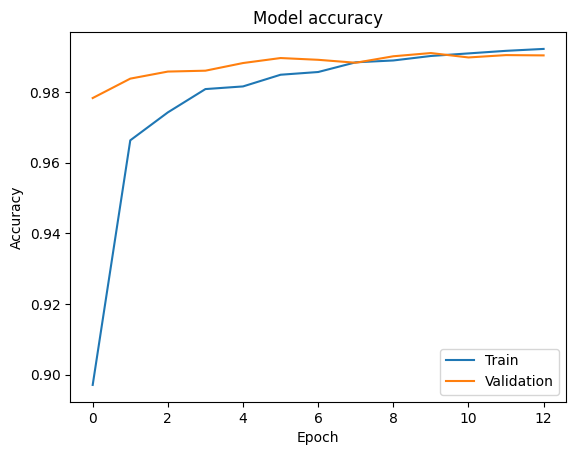

In [6]:
#evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

#plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [7]:
#transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#load CIFAR 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#split data
train_size = int(0.8 * len(trainset))
valid_size = len(trainset) - train_size
train_dataset, valid_dataset = random_split(trainset, [train_size, valid_size])

#create data loaders
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
testloader = DataLoader(testset, batch_size=128, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [14]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = LeNet().to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [16]:
min_valid_loss = np.inf
patience = 5
trigger_times = 0

train_losses, valid_losses = [], []

for epoch in range(25):  # loop

    train_loss, valid_loss = 0.0, 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        #get the inputs and labels
        inputs, labels = data[0].to(device), data[1].to(device)

        #zero grads
        optimizer.zero_grad()

        #forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        #backward pass
        loss.backward()

        #optimizer step
        optimizer.step()

        #accumulate training loss
        train_loss += loss.item() * inputs.size(0)  #multiply loss by batch size

    net.eval()
    with torch.no_grad():
        for i, data in enumerate(validloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            #accumulate validation loss
            valid_loss += loss.item() * inputs.size(0)  #multiply loss by batch size

    #calculate average loss
    train_loss = train_loss / len(trainloader.sampler)
    valid_loss = valid_loss / len(validloader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 5 == 0:
        print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f} \tValidation Loss: {valid_loss:.6f}')

    #early stopping
    if valid_loss < min_valid_loss:
        min_valid_loss = valid_loss
        trigger_times = 0
    else:
        trigger_times += 1
        print('Trigger Times:', trigger_times)

        if trigger_times >= patience:
            print('Early stopping!')
            break

print('Finished Training')


Epoch: 0 	Training Loss: 2.304548 	Validation Loss: 2.302548
Epoch: 5 	Training Loss: 1.962690 	Validation Loss: 1.895919
Epoch: 10 	Training Loss: 1.582151 	Validation Loss: 1.568224
Epoch: 15 	Training Loss: 1.426144 	Validation Loss: 1.438247
Epoch: 20 	Training Loss: 1.329596 	Validation Loss: 1.365938
Trigger Times: 1
Finished Training


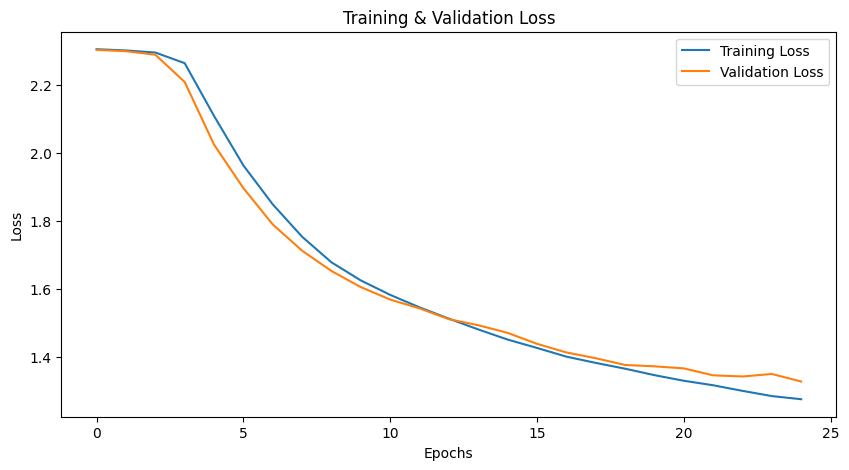

In [17]:
# Plot Training and Validation Losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eval

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


# Visualize

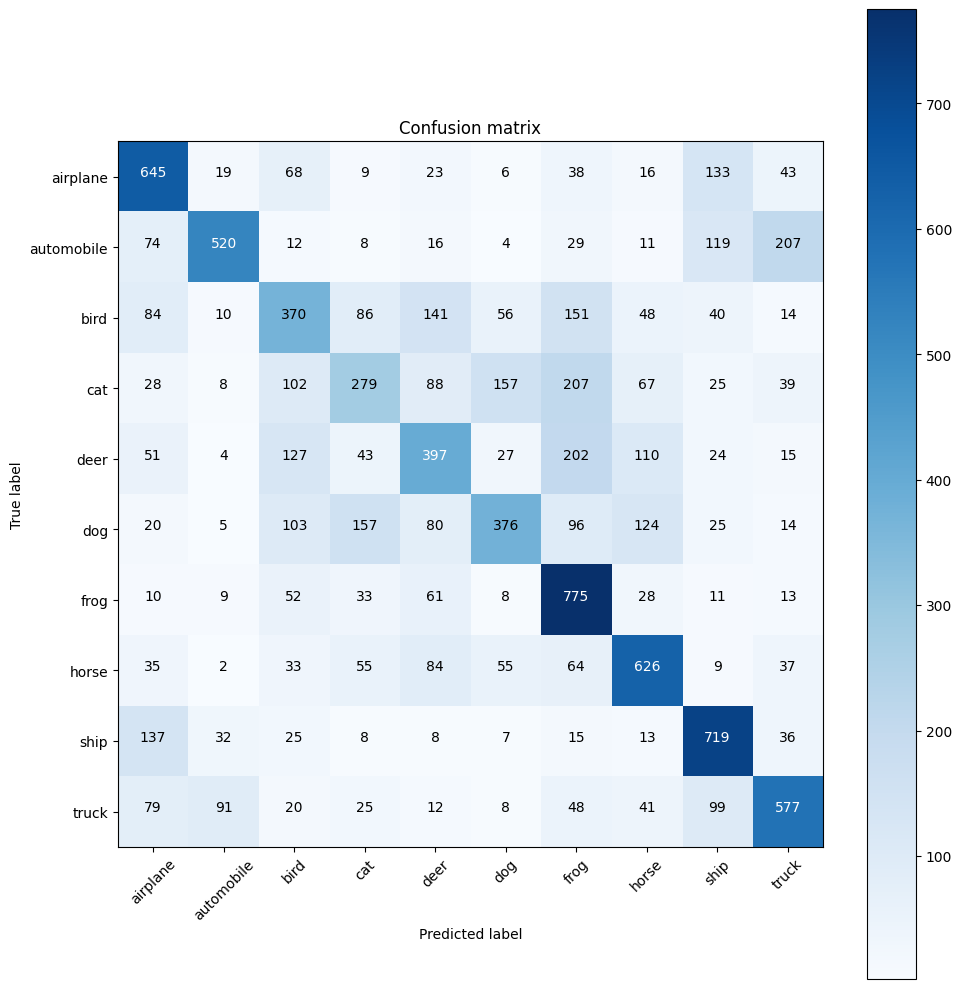

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Test the network on the whole dataset
y_pred = []
y_true = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.view(-1).tolist())
        y_true.extend(labels.view(-1).tolist())

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_matrix, classes=trainset.classes)
